# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


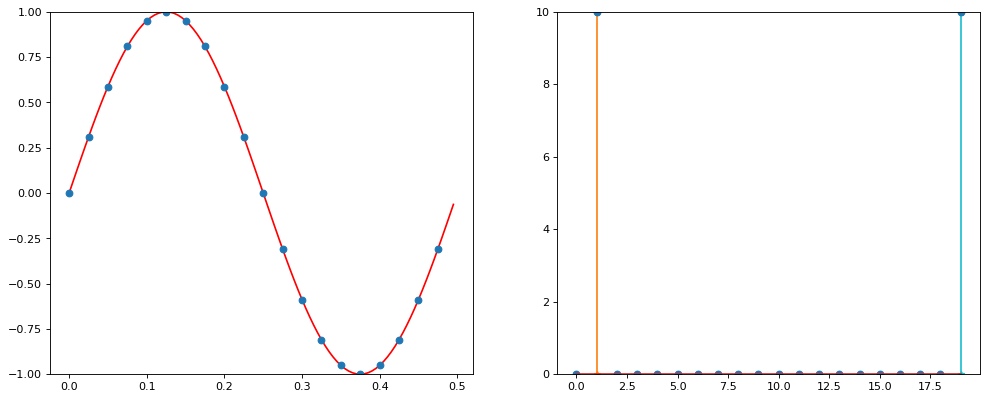

In [2]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n)) # range HZ


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


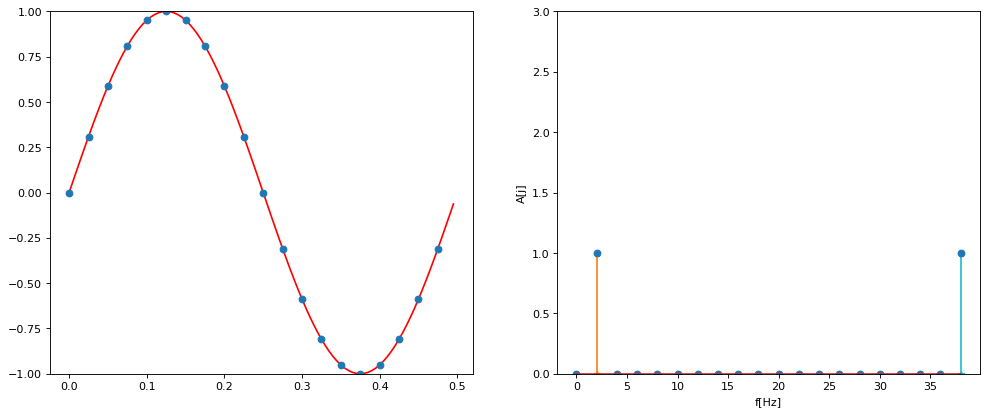

In [57]:
# Zdefiniuj funckję
def SginalR(A, LP, w, f):
    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1) / len(signal) * 2
    # modul sygnalu
    
    #TW
    freqs = np.arange(0, w, w / n) # range HZ


    ax = fig.add_subplot(122)
    
    #ax.set_ylim([0.0, A])
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    plt.xlabel("f[Hz]")
    plt.ylabel("A[j]")
    
    plt.show()

#SginalR(1, 1, 4, 1)
SginalR(1, 1, 40, 2.0)

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [4]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


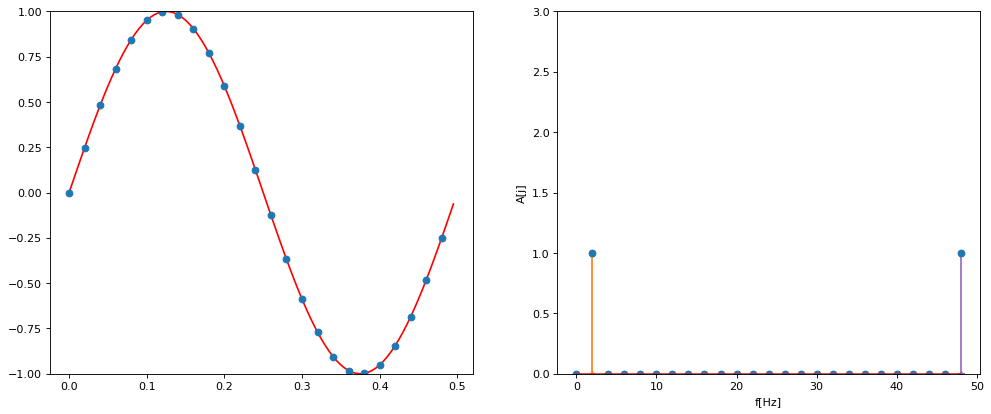

In [58]:
# w=50
SginalR(1, 1, 50, 2.0)

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


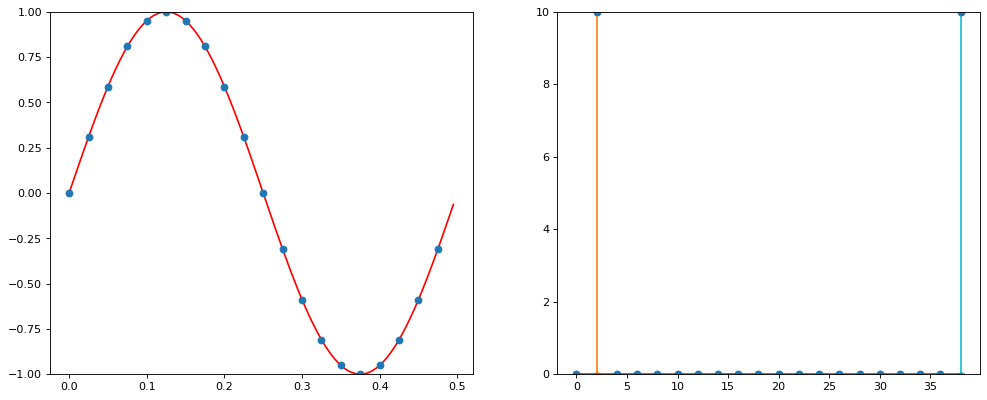

In [14]:
# popraw oś OX
#def SginalR(A, LP, w, f):
SginalR(1, 1, 40, 2.0)

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [17]:
# Podpisz osie wykresów


f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


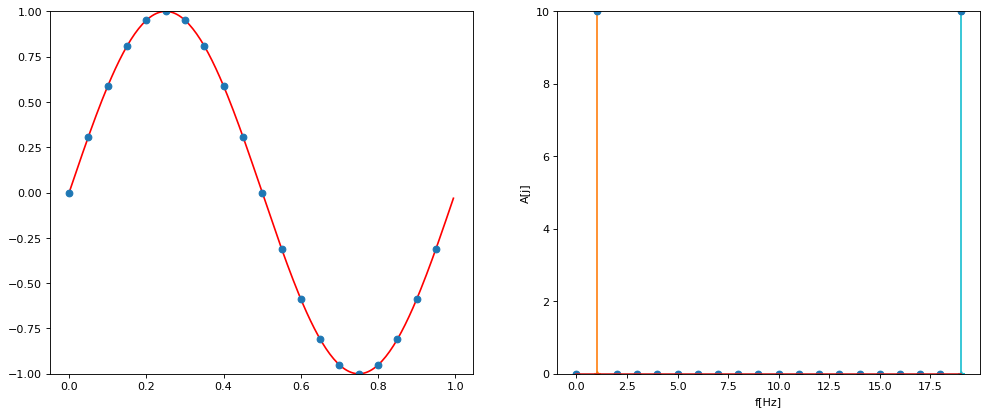

In [18]:
# f=1, A=1, LP=1
SginalR(1, 1, 20, 1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


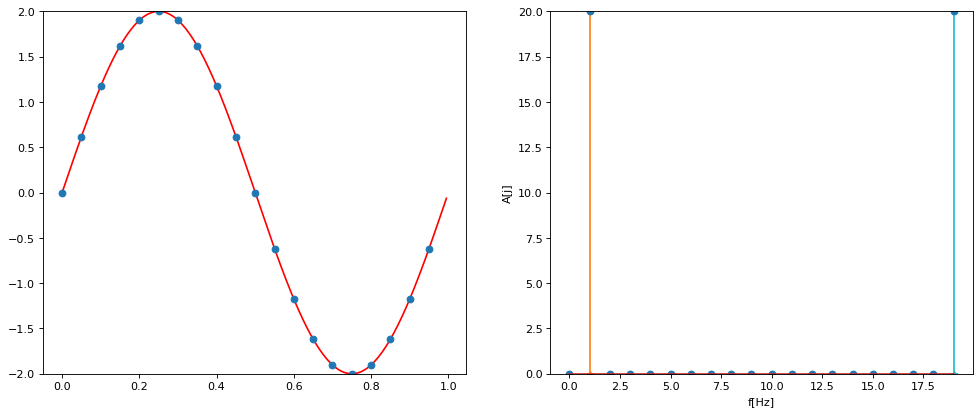

In [31]:
# f=1, A=2, LP=1
SginalR(2, 1, 20, 1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


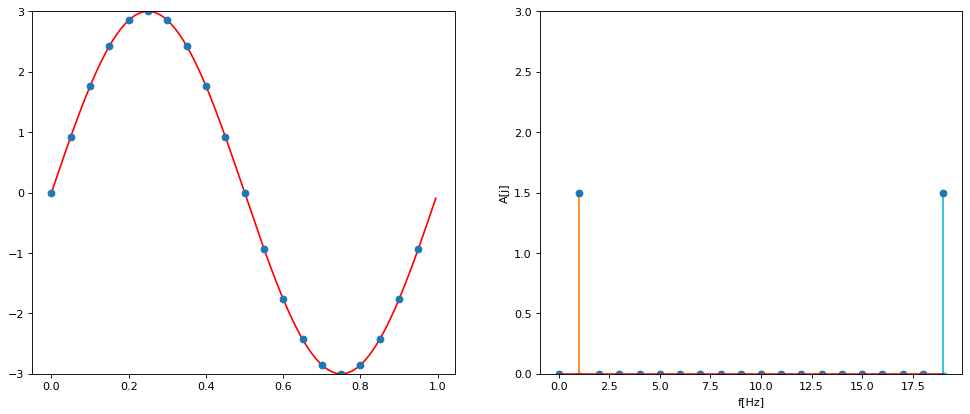

In [56]:
# f=1, A=3, LP=1
SginalR(3, 1, 20, 1)

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


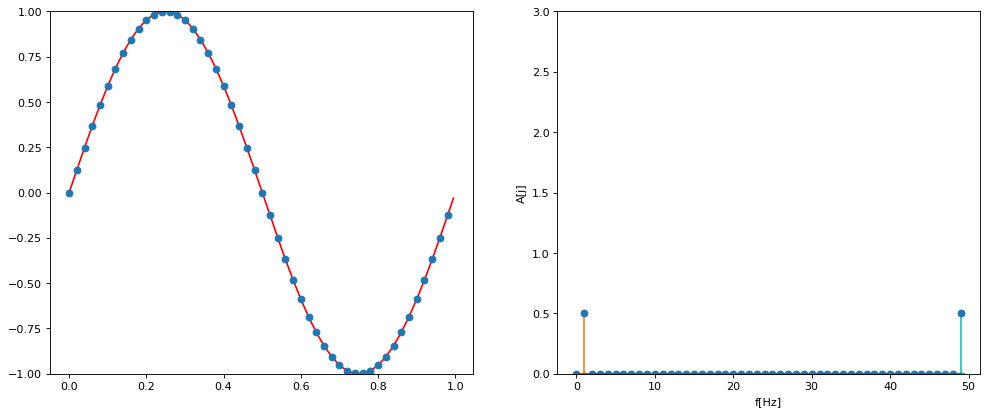

In [55]:
# f=1, w=50, LP=1
SginalR(1, 1, 50, 1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


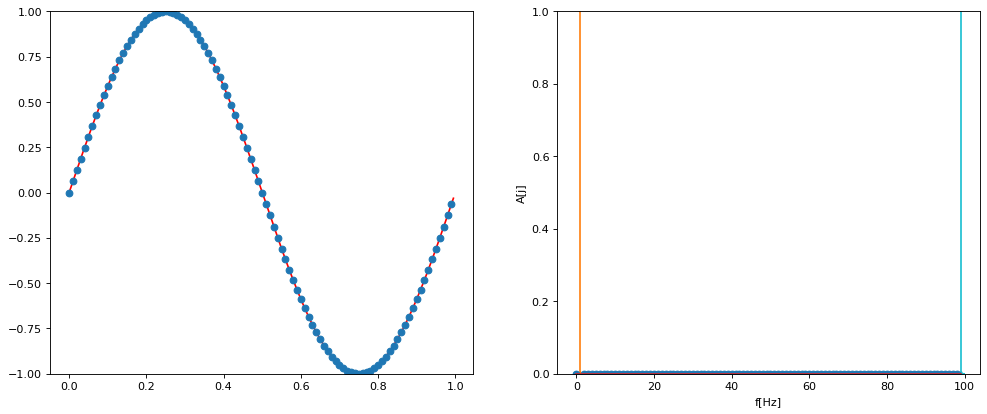

In [36]:
# f=1, w=100, LP=1
SginalR(1, 1, 100, 1)

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [ ]:
# popraw oś OY

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


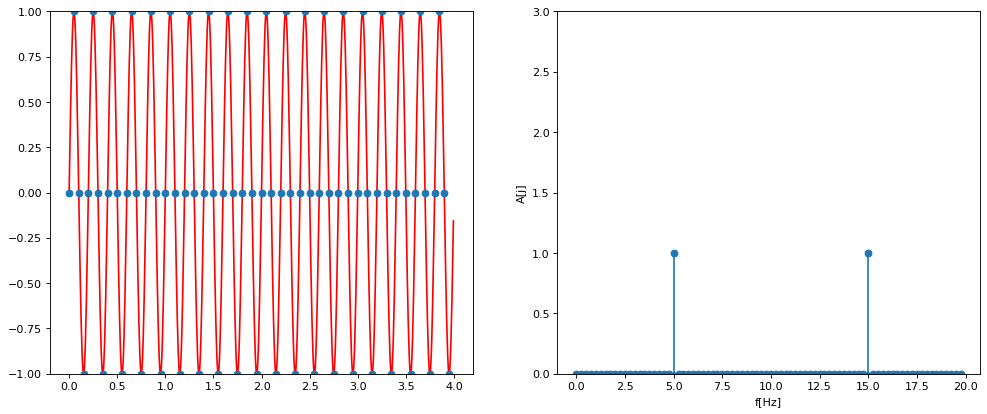

In [60]:
# f=5, w=20, LP=20
SginalR(1, 20, 20, 5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


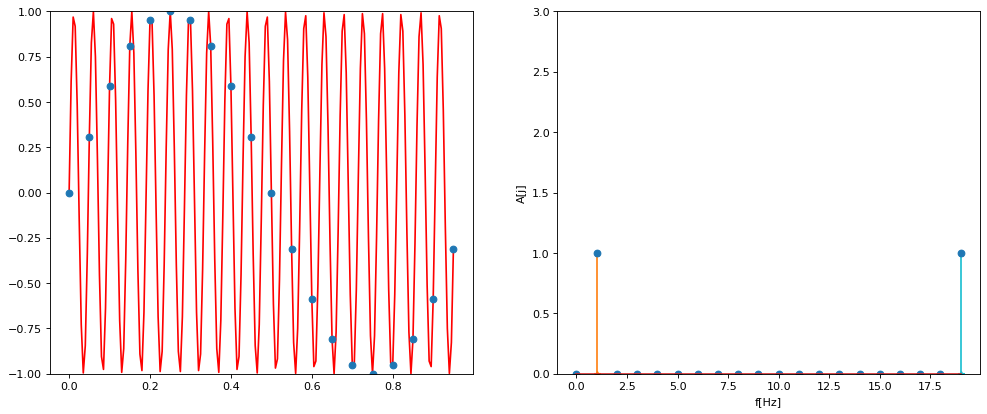

In [59]:
# f=21, w=20, LP=20
SginalR(1, 20, 20, 21)

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


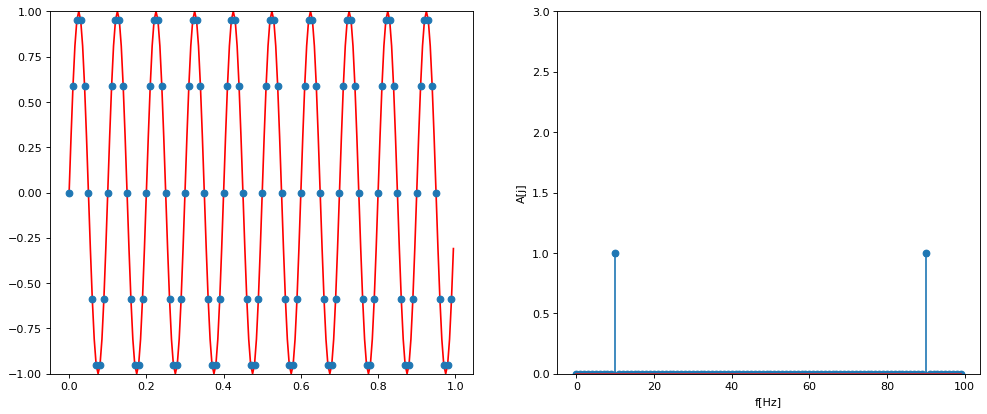

In [61]:
# f=10, w=100, A=1, LP=10
SginalR(1, 10, 100, 10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


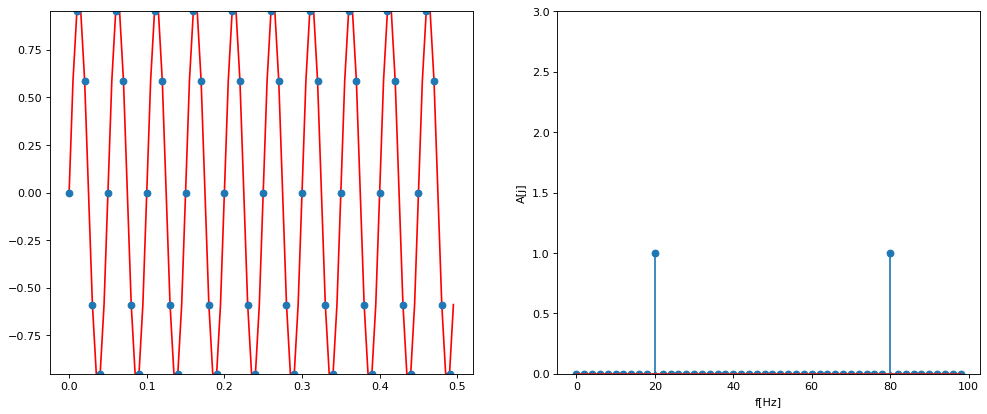

In [62]:
# f=20, w=100, A=1, LP=10
SginalR(1, 10, 100, 20)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


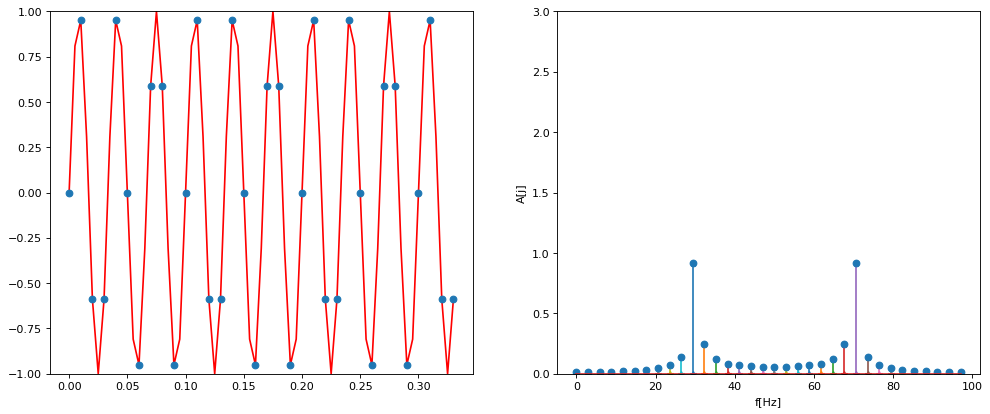

In [63]:
# f=30, w=100, A=1, LP=10
SginalR(1, 10, 100, 30)

iv) $sin(2*pi*t*f)$, $f=40Hz$

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


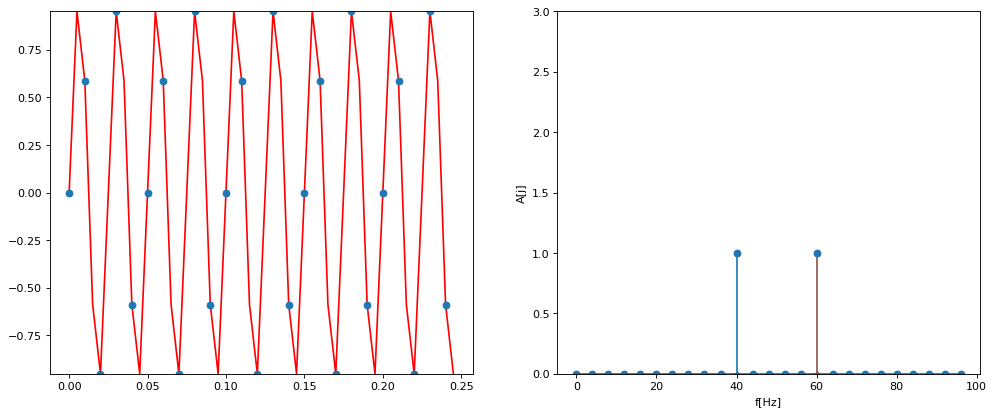

In [64]:
# f=40, w=100, A=1, LP=10
SginalR(1, 10, 100, 40)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


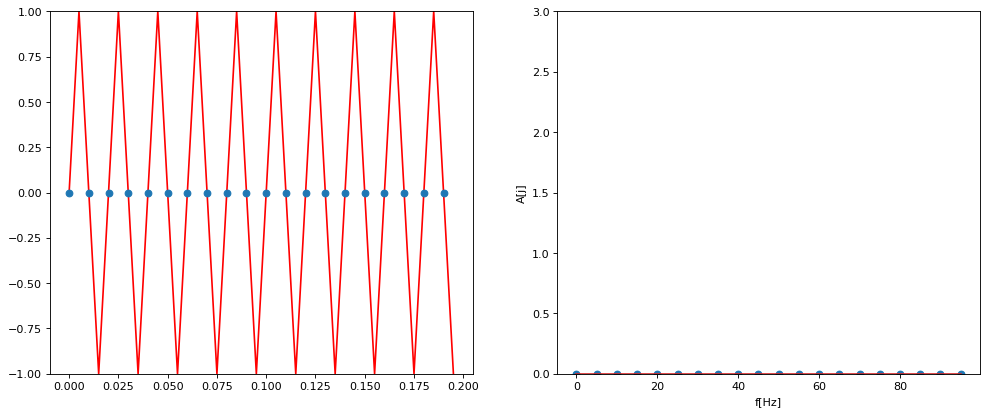

In [65]:
# f=50, w=100, A=1, LP=10
SginalR(1, 10, 100, 50)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

200
200


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


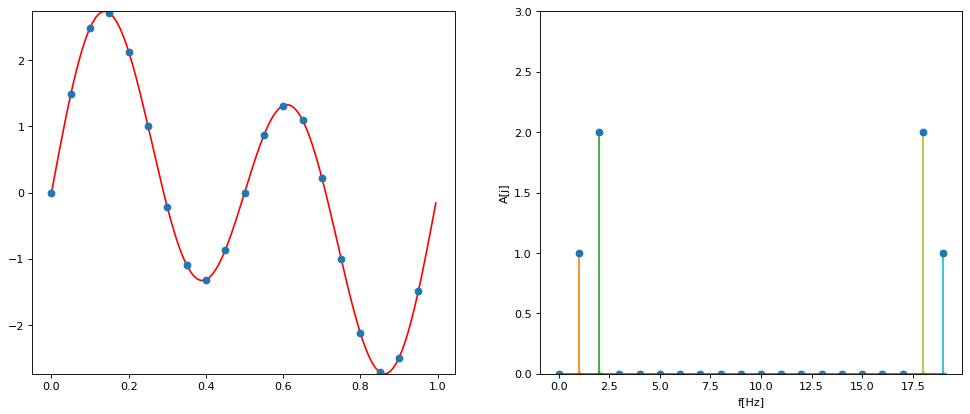

In [82]:
def SginalRM(A1, A2, w, T, LP):
    
    #A, LP, w, f
    suma = 0
    f = 1 / T   
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)



    FUNC = lambda t :  A1*sin(2*pi*t*f) + A2*sin(4*pi*t*f) 
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    print(len(base_signal))
    print(len(base_t))
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1) / len(signal) * 2
    # modul sygnalu

    #TW
    freqs = np.arange(0, w, w / n) # range HZ


    ax = fig.add_subplot(122)

    #ax.set_ylim([0.0, A])
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    
    
    plt.xlabel("f[Hz]")
    plt.ylabel("A[j]")
    
    plt.show()

#SginalR(1, 1, 4, 1)

SginalRM(1, 2, 20, 1, 1)

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

200
200


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


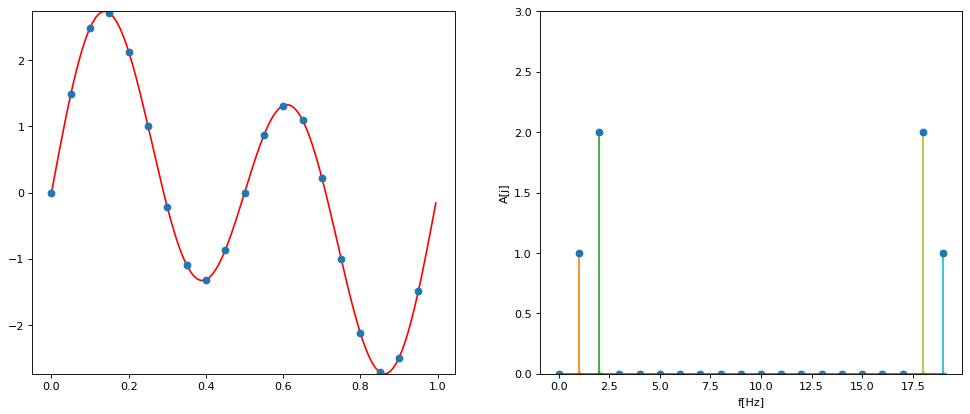

In [85]:
def SginalRM(A1, A2, w, T, LP):
    
    #A, LP, w, f
    suma = 0
    f = 1 / T   
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)



    FUNC = lambda t :  A1*sin(2*pi*t*f) + A2*sin(4*pi*t*f) 
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    print(len(base_signal))
    print(len(base_t))
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1) / len(signal) * 2
    # modul sygnalu

    #TW
    freqs = np.arange(0, w, w / n) # range HZ


    ax = fig.add_subplot(122)

    #ax.set_ylim([0.0, A])
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    
    
    plt.xlabel("f[Hz]")
    plt.ylabel("A[j]")
    
    plt.show()

#SginalR(1, 1, 4, 1)

SginalRM(1, 2, 20, 1, 1)

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

In [3]:
# Wyrysuj sygnał
# Wyrysuj sygnał
# Zdefiniuj funckję
def create_signal(A = 2, LP = 1, w = 40, f = 2.0):
   
    T = 1.0/f  
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
 
    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)
 
    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki
 
    n = len(t)
 
 
 
    FUNC = lambda t :  0.5 + A*sin(2*pi*t*f)
    # def. funkcji (tutaj sinus)
 
    signal = FUNC(t)                
    # funkcja sprobkowana
 
    fig = plt.figure(figsize=(15, 6), dpi=80)  
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    print(len(base_signal))
    print(len(base_t))
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## ---
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci
    signal1 = abs(signal1) / len(signal) * 2
    # modul sygnalu
 
    #TW
    freqs = np.arange(0, w, w / n) # range HZ
 
 
    ax = fig.add_subplot(122)
 
    #ax.set_ylim([0.0, A])
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.stem(freqs, signal1, '-*')
   
   
    plt.xlabel("f[Hz]")
    plt.ylabel("A[j]")
   
    plt.show()
 
create_signal(f=1.0,w=20)


NameError: name 'np' is not defined

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

200
200
[-9.95799250e-17+0.00000000e+00j -2.89802224e-15-1.00000000e+01j
 -3.87146556e-16+5.93199693e-16j -2.34291073e-15+2.22044605e-15j
 -3.18531000e-16+2.51508181e-16j  5.15749193e-16-1.72386271e-15j
  8.54120521e-16-2.20697876e-16j -1.58905457e-15-2.66453526e-15j
  6.74482662e-16+3.01360300e-16j  5.46437804e-16-4.39678753e-17j
 -3.21624530e-16+1.23259516e-32j -2.71862899e-15+2.10942375e-15j
  6.74482662e-16-3.01360300e-16j  9.68791740e-16+4.39678753e-17j
  8.54120521e-16+2.20697876e-16j -2.37415931e-15-1.44328993e-15j
 -3.18531000e-16-2.51508181e-16j  2.54720105e-16+1.72386271e-15j
 -3.87146556e-16-5.93199693e-16j  8.41243020e-15+1.00000000e+01j]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


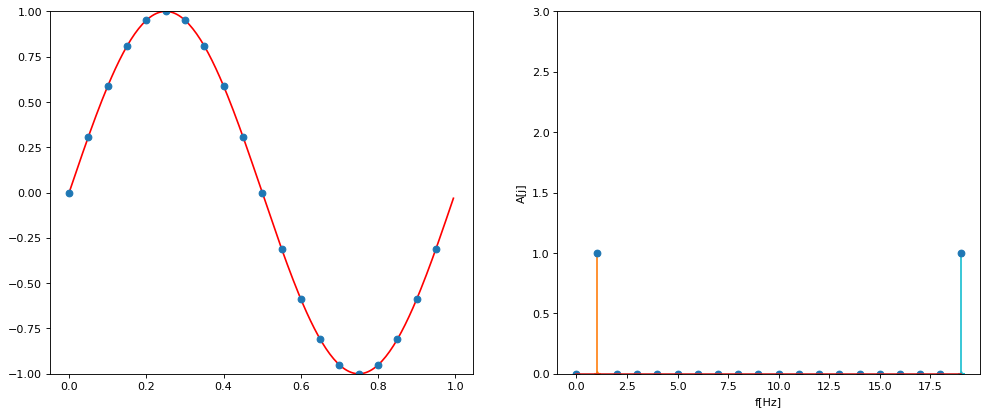

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


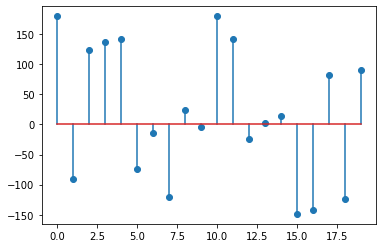

In [3]:
# faza = 0
# Wyrysuj sygnał
# Zdefiniuj funckję
def create_signal(A = 1, LP = 1, w = 40, f = 2.0):
   
    T = 1.0/f  
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
 
    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)
 
    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki
 
    n = len(t)
 
 
 
    FUNC = lambda t :  A*sin(2*pi*t*f)
    # def. funkcji (tutaj sinus)
 
    signal = FUNC(t)                
    # funkcja sprobkowana
 
    fig = plt.figure(figsize=(15, 6), dpi=80)  
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    print(len(base_signal))
    print(len(base_t))
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## ---
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    # sygnal w dziedzinie czestotliwosci
    print(signal1)
    angles = angle(signal1, deg=True)
    signal1 = abs(signal1) / len(signal) * 2
    # modul sygnalu
 
    #TW
    freqs = np.arange(0, w, w / n) # range HZ
 
 
    ax = fig.add_subplot(122)
 
    #ax.set_ylim([0.0, A])
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.stem(freqs, signal1, '-*')
   
   
    plt.xlabel("f[Hz]")
    plt.ylabel("A[j]")
   
    plt.show()
    stem(angles)
    
create_signal(f=1.0, w=20)
 


200
200
[-3.88578059e-16+0.00000000e+00j  7.07106781e+00-7.07106781e+00j
 -4.67204490e-16+8.82096964e-16j  0.00000000e+00+3.10862447e-15j
 -7.55361932e-16-1.40035452e-16j  1.46916375e-15-1.68034072e-15j
  1.02231600e-15-1.07406816e-16j -2.66453526e-15+4.44089210e-16j
  6.72095206e-16+9.34891206e-16j  9.10796345e-17+9.99651148e-16j
 -5.55111512e-16+2.21867130e-31j -2.22044605e-16+2.99760217e-15j
  6.72095206e-16-9.34891206e-16j  5.75054180e-16+7.76705691e-16j
  1.02231600e-15+1.07406816e-16j -2.88657986e-15+1.22124533e-15j
 -7.55361932e-16+1.40035452e-16j -5.80985328e-16+7.92162296e-16j
 -4.67204490e-16-8.82096964e-16j  7.07106781e+00+7.07106781e+00j]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


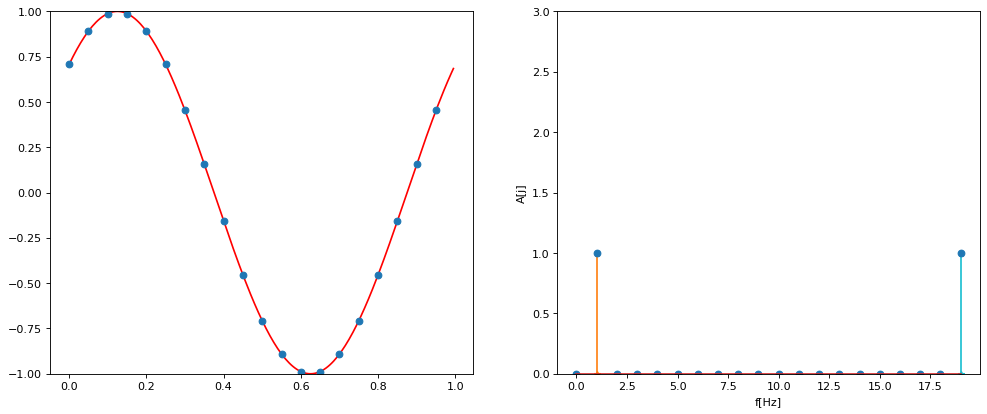

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


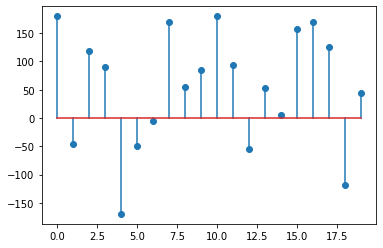

In [4]:
# faza = pi/4
# Wyrysuj sygnał
# Zdefiniuj funckję
def create_signal(A = 1, LP = 1, w = 40, f = 2.0):
   
    T = 1.0/f  
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)
 
    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)
 
    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki
 
    n = len(t)
 
 
 
    FUNC = lambda t :  A*sin(2*pi*t*f + pi/4)
    # def. funkcji (tutaj sinus)
 
    signal = FUNC(t)                
    # funkcja sprobkowana
 
    fig = plt.figure(figsize=(15, 6), dpi=80)  
    ax = fig.add_subplot(121)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    print(len(base_signal))
    print(len(base_t))
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## ---
    ax.plot(t, signal, 'o')
    signal1 = fft(signal)
    print(signal1)
    angles = angle(signal1, deg=True)

    # sygnal w dziedzinie czestotliwosci
    signal1 = abs(signal1) / len(signal) * 2
    # modul sygnalu
 
    #TW
    freqs = np.arange(0, w, w / n) # range HZ
 
 
    ax = fig.add_subplot(122)
 
    #ax.set_ylim([0.0, A])
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.stem(freqs, signal1, '-*')
   
   
    plt.xlabel("f[Hz]")
    plt.ylabel("A[j]")
   
    plt.show()
    stem(angles)
   
create_signal(f=1.0, w=20)

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [ ]:
# wygeneruj wektor x


In [ ]:
# oblicz fft z x


In [ ]:
# oblicz ifft

In [ ]:
#porownaj x z ifft(fft(x)), wystarczy print